In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy import special

In [33]:
def diffusion_equation(grid, D, dx, dt):
    new_grid=np.copy(grid)
    coefficient = dt * D / dx / dx
    for i in range(1, len((grid)) - 1):
        for j in range(1, len(grid[i,:]) -1):
            new_grid[i, j] = grid[i,j] + coefficient * (grid[i+1,j] + grid[i-1,j] + grid[i,j + 1] + grid[i, j -1] - 4 * grid[i,j])
        boundary = grid[i, 0] + coefficient * (grid[i+1,0] + grid[i-1,0] + grid[i,1] + grid[i,-2] - 4 * grid[i,0])
        new_grid[i,0] = boundary
        new_grid[i,-1] = boundary
    return new_grid


1.0


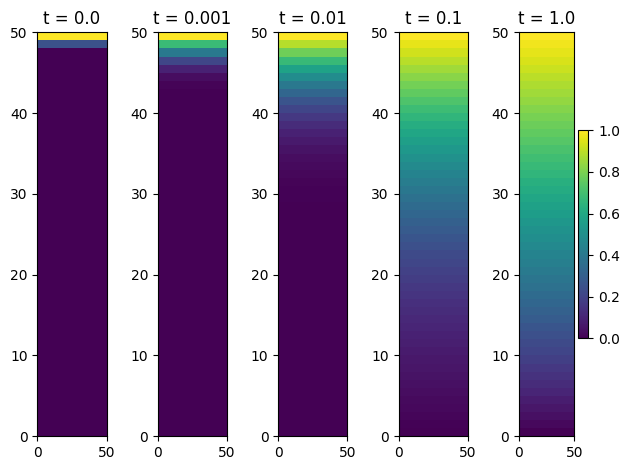

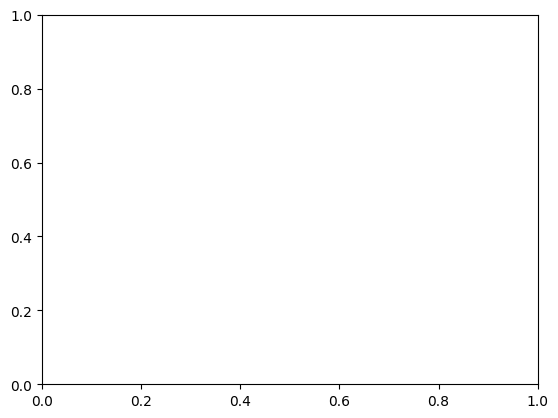

In [135]:
fig, axs = plt.subplots(1, 5, layout="tight")
fig2, ax2 = plt.subplots()
artists = []
i =0
j = 0
numerical = []
D = 1
dt = .0001
N = 50
dx = 1/ N
print(4*D * dt / dx / dx)
initial_grid = np.zeros((N,N))
initial_grid[-1:] += 1
timeline = np.arange(0, 1+dt, dt)
grid = initial_grid
for t in timeline:
    new_grid = diffusion_equation(grid, D, dx, dt)
    grid = new_grid
    # # if t % .01 == 0:
    # container = ax2.pcolormesh(grid)
    # artists.append(container)
    if t in [0, 0.001, 0.01, 0.1, 1]:
        numerical.append(np.mean(grid, axis=1))
        axs[i].set_title(f"t = {t}")
        im = axs[i].pcolormesh(grid)
        i += 1
fig.colorbar(im, ax=axs[-1], location="right")

# ani = animation.ArtistAnimation(fig=fig2, artists=artists)
# ani.save("diffusion.gif")
# HTML(ani.to_jshtml())


In [97]:
def eval_analytical(t, N):
    x = np.linspace(0,1, N)
    c = 0
    for i in range(10):
        c += special.erfc((1 - x + 2*i)/(2*np.sqrt(t))) -  special.erfc((1 + x + 2*i)/(2*np.sqrt(t))) 
    return c
analytical = []
t_vals =[0.001, 0.01, 0.1, 1] 
for t in t_vals:
    analytical.append(eval_analytical(t, N))

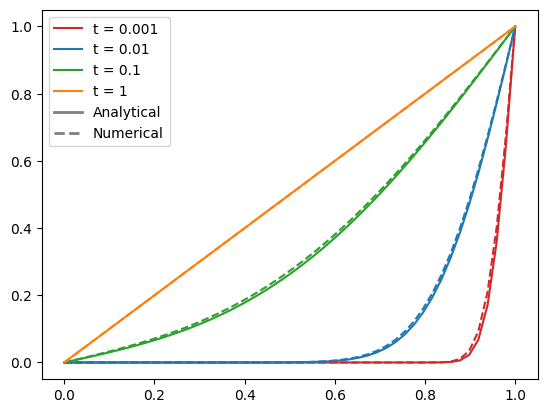

In [108]:
colors = ["tab:red", "tab:blue", "tab:green", "tab:orange"]
lines = []
for i in range(len(analytical)):
    plt.plot(np.linspace(0,1, N), analytical[i], color=colors[i])
    plt.plot(np.linspace(0,1, N), numerical[i+1], "--", color=colors[i])
    lines.append(plt.Line2D([0], [0], color=colors[i], label=f"t = {t_vals[i]}"))
lines.append(plt.Line2D([0], [0], color='tab:grey', lw=2, linestyle='-', label="Analytical"))
lines.append(plt.Line2D([0], [0], color='tab:grey', lw=2, linestyle='--', label="Numerical"))
plt.legend(handles=lines)

In [64]:
analytical

[array([0.        , 0.01989112, 0.03978224, 0.05967336, 0.07956447,
        0.09945559, 0.1193467 , 0.13923781, 0.15912891, 0.17902001,
        0.1989111 , 0.21880218, 0.23869326, 0.25858433, 0.2784754 ,
        0.29836645, 0.3182575 , 0.33814853, 0.35803956, 0.37793057,
        0.39782157, 0.41771256, 0.43760354, 0.4574945 , 0.47738545,
        0.49727638, 0.5171673 , 0.5370582 , 0.55694909, 0.57683995,
        0.5967308 , 0.61662163, 0.63651244, 0.65640324, 0.67629401,
        0.69618476, 0.71607548, 0.73596619, 0.75585687, 0.77574753,
        0.79563817, 0.81552877, 0.83541936, 0.85530992, 0.87520045,
        0.89509095, 0.91498143, 0.93487188, 0.95476229, 0.97465268]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.